In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve 
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

In [87]:
#loading data
df = pd.read_csv('C:/Users/abhis/Downloads/Bank customer/Bank Customer Churn Prediction.csv')

In [88]:
df

customer_id  credit_score  country  gender  age  tenure   balance  \
0        15634602           619   France  Female   42       2      0.00   
1        15647311           608    Spain  Female   41       1  83807.86   
2        15619304           502   France  Female   42       8 159660.80   
3        15701354           699   France  Female   39       1      0.00   
4        15737888           850    Spain  Female   43       2 125510.82   
...           ...           ...      ...     ...  ...     ...       ...   
9995     15606229           771   France    Male   39       5      0.00   
9996     15569892           516   France    Male   35      10  57369.61   
9997     15584532           709   France  Female   36       7      0.00   
9998     15682355           772  Germany    Male   42       3  75075.31   
9999     15628319           792   France  Female   28       4 130142.79   

      products_number  credit_card  active_member  estimated_salary  churn  
0                   1            1              1         101348.88      1  
1                   1            0              1         112542.58      0  
2                   3            1              0         113931.57      1  
3                   2            0              0          93826.63      0  
4                   1            1              1          79084.10      0  
...               ...          ...            ...               ...    ...  
9995                2            1              0          96270.64      0  
9996                1            1              1         101699.77      0  
9997                1            0              1          42085.58      1  
9998                2            1              0          92888.52      1  
9999                1            1              0          38190.78      0  

[10000 rows x 12 columns]

In [89]:
df.shape

(10000, 12)

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [91]:
df.columns.values

array(['customer_id', 'credit_score', 'country', 'gender', 'age',
       'tenure', 'balance', 'products_number', 'credit_card',
       'active_member', 'estimated_salary', 'churn'], dtype=object)

In [92]:
df.dtypes

customer_id           int64
credit_score          int64
country              object
gender               object
age                   int64
tenure                int64
balance             float64
products_number       int64
credit_card           int64
active_member         int64
estimated_salary    float64
churn                 int64
dtype: object

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

In [94]:
df = df.drop(['customer_id'], axis = 1)
df.head()

credit_score country  gender  age  tenure   balance  products_number  \
0           619  France  Female   42       2      0.00                1   
1           608   Spain  Female   41       1  83807.86                1   
2           502  France  Female   42       8 159660.80                3   
3           699  France  Female   39       1      0.00                2   
4           850   Spain  Female   43       2 125510.82                1   

   credit_card  active_member  estimated_salary  churn  
0            1              1         101348.88      1  
1            0              1         112542.58      0  
2            1              0         113931.57      1  
3            0              0          93826.63      0  
4            1              1          79084.10      0

In [95]:
df.isnull().sum()

credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

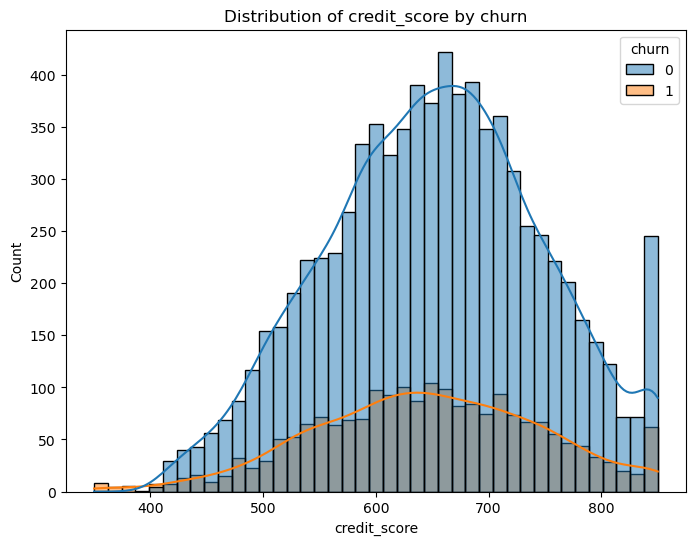

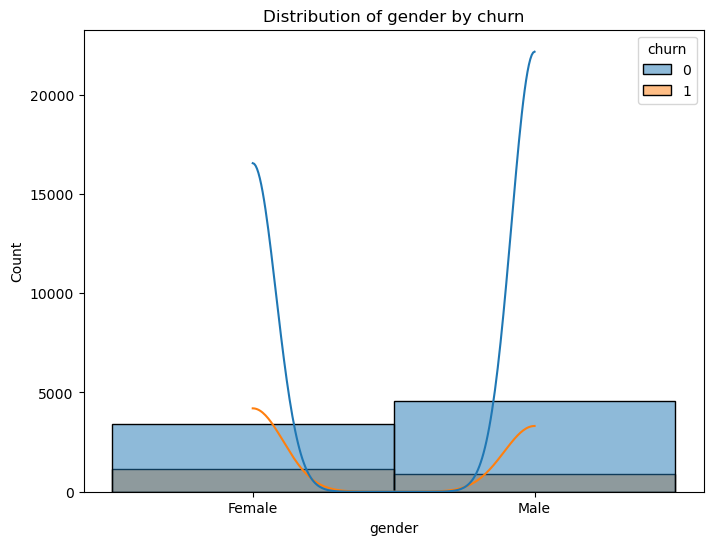

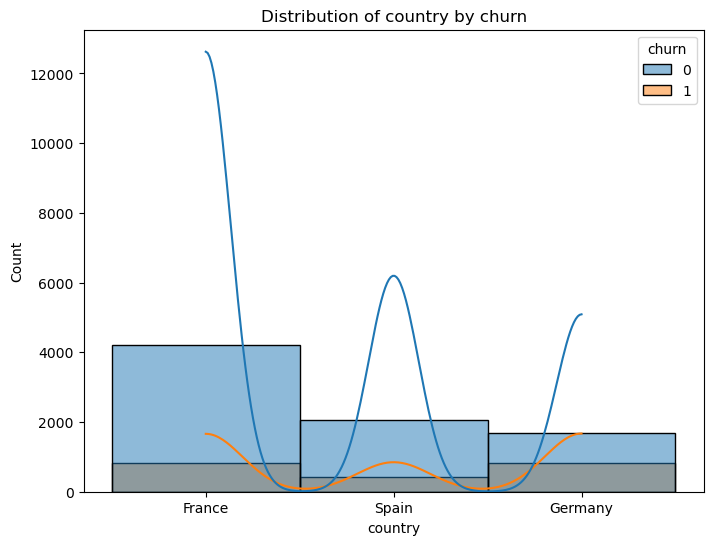

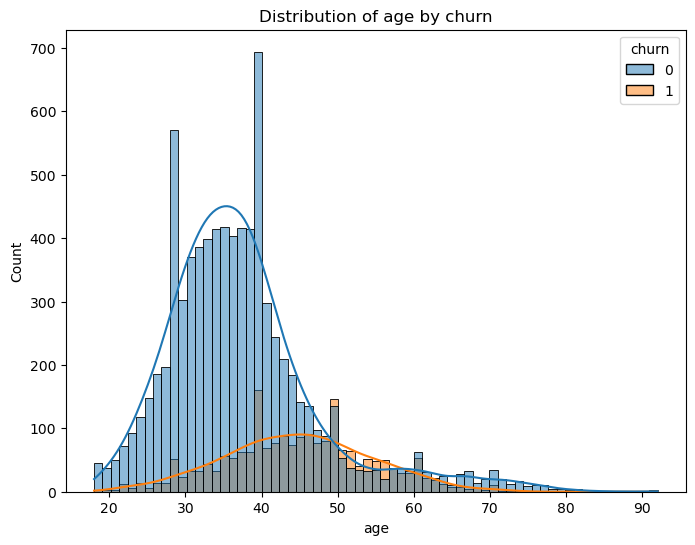

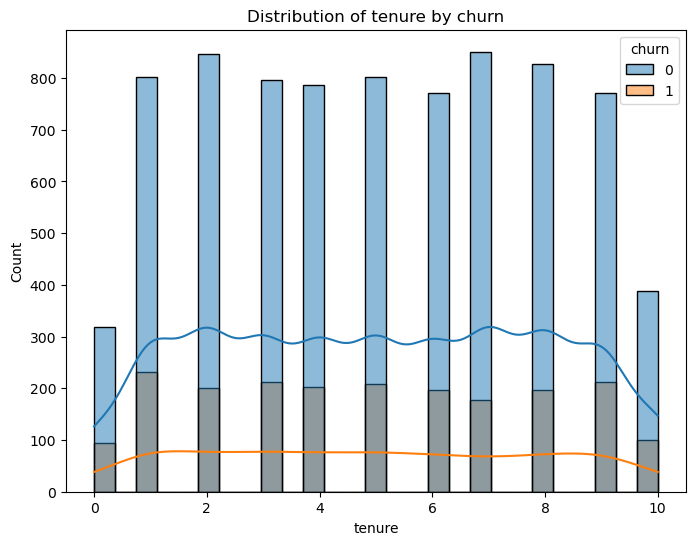

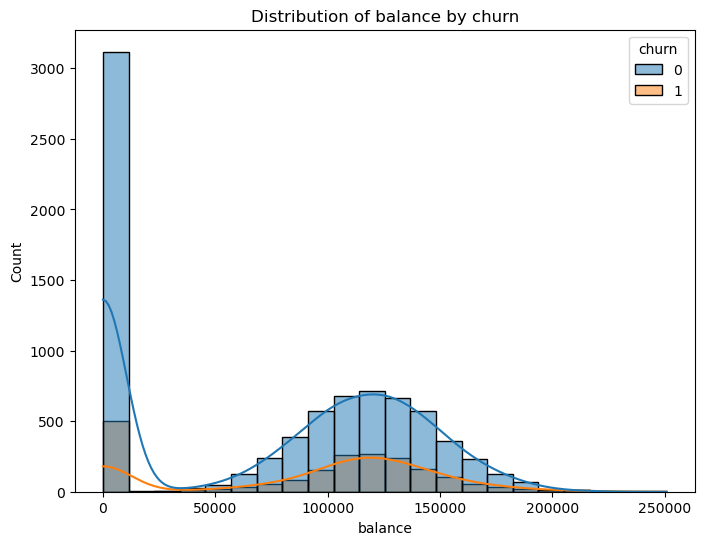

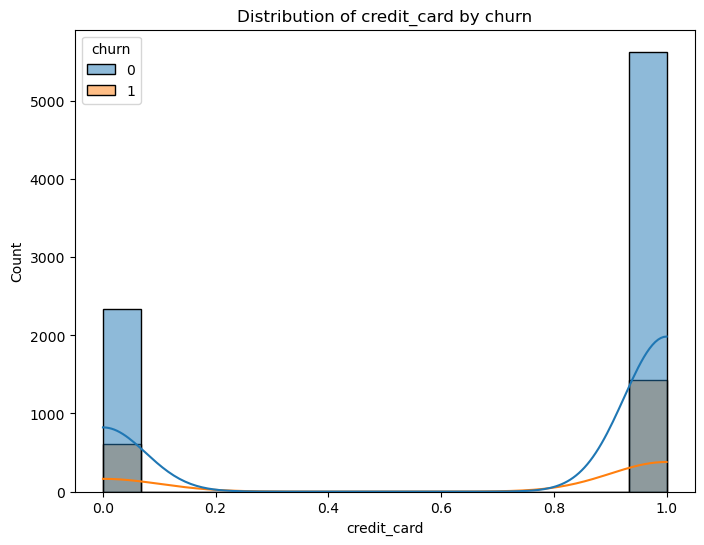

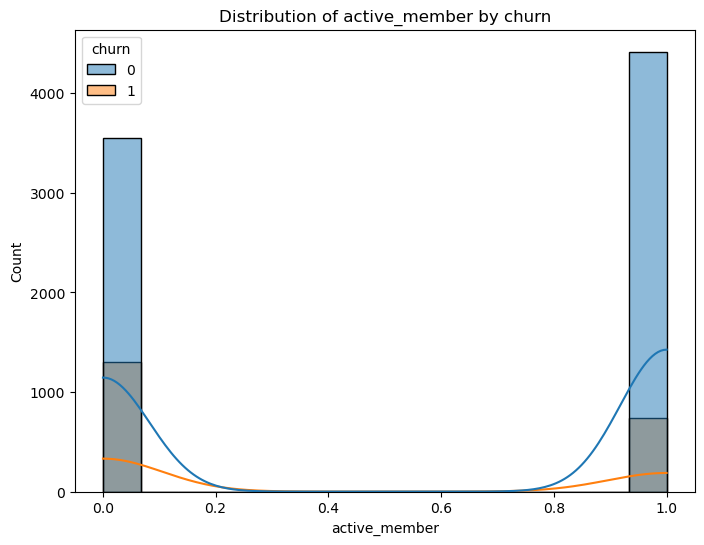

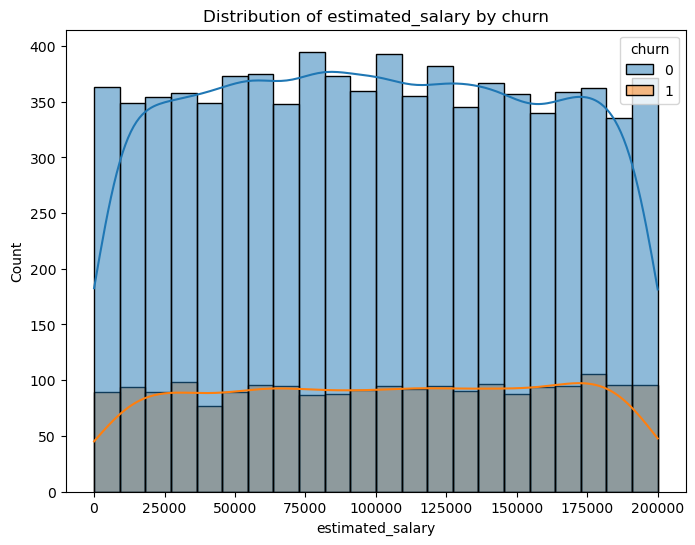

In [96]:
visuale_features = ["credit_score", "gender", "country", "age", "tenure", "balance", "credit_card", "active_member", "estimated_salary"]
for feature in visuale_features:
    plt.figure(figsize=(8,6))
    sns.histplot(data=df, x=feature, hue="churn", kde=True)
    plt.title (f"Distribution of {feature} by churn")
    plt.show()

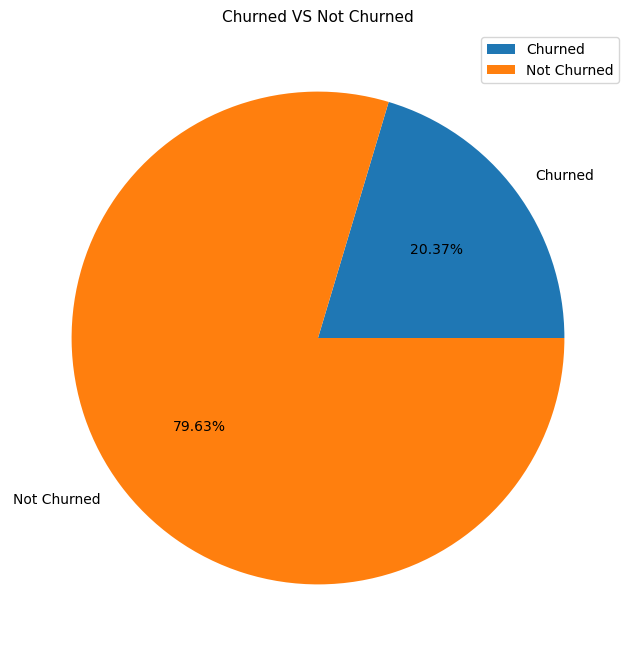

In [97]:
pic = [df.churn[df['churn']==1].count(),
         df.churn[df['churn']==0].count()]
labels = ['Churned', 'Not Churned']
figure, axes = plt.subplots(figsize=(10, 8))
axes.pie(pic, labels=labels,autopct = '%1.2f%%')
plt.title("Churned VS Not Churned", size = 11)
plt.legend()
plt.show()

In [98]:
count_spain = df.churn[(df.country == 'Spain') & (df.churn == 1)].count()
print("Spanish People Who Churned --->",count_spain)
count_france = df.churn[(df.country == 'France') & (df.churn == 1)].count()
print("France People Who Churned --->",count_france)
count_germany = df.churn[(df.country == 'Germany') & (df.churn == 1)].count()
print("German People Who Churned --->",count_germany)

Spanish People Who Churned ---> 413
France People Who Churned ---> 810
German People Who Churned ---> 814


In [149]:
def object_to_int(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

In [151]:
df = df.apply(lambda X: object_to_int(X))
df

credit_score  country  gender  age  tenure   balance  products_number  \
0              619        0       0   42       2      0.00                1   
1              608        2       0   41       1  83807.86                1   
2              502        0       0   42       8 159660.80                3   
3              699        0       0   39       1      0.00                2   
4              850        2       0   43       2 125510.82                1   
...            ...      ...     ...  ...     ...       ...              ...   
9995           771        0       1   39       5      0.00                2   
9996           516        0       1   35      10  57369.61                1   
9997           709        0       0   36       7      0.00                1   
9998           772        1       1   42       3  75075.31                2   
9999           792        0       0   28       4 130142.79                1   

      credit_card  active_member  estimated_salary  churn  
0               1              1         101348.88      1  
1               0              1         112542.58      0  
2               1              0         113931.57      1  
3               0              0          93826.63      0  
4               1              1          79084.10      0  
...           ...            ...               ...    ...  
9995            1              0          96270.64      0  
9996            1              1         101699.77      0  
9997            0              1          42085.58      1  
9998            1              0          92888.52      1  
9999            1              0          38190.78      0  

[10000 rows x 11 columns]

In [152]:
df.corr()

credit_score  country  gender   age  tenure  balance  \
credit_score              1.00     0.01   -0.00 -0.00    0.00     0.01   
country                   0.01     1.00    0.00  0.02    0.00     0.07   
gender                   -0.00     0.00    1.00 -0.03    0.01     0.01   
age                      -0.00     0.02   -0.03  1.00   -0.01     0.03   
tenure                    0.00     0.00    0.01 -0.01    1.00    -0.01   
balance                   0.01     0.07    0.01  0.03   -0.01     1.00   
products_number           0.01     0.00   -0.02 -0.03    0.01    -0.30   
credit_card              -0.01    -0.01    0.01 -0.01    0.02    -0.01   
active_member             0.03     0.01    0.02  0.09   -0.03    -0.01   
estimated_salary         -0.00    -0.00   -0.01 -0.01    0.01     0.01   
churn                    -0.03     0.04   -0.11  0.29   -0.01     0.12   

                  products_number  credit_card  active_member  \
credit_score                 0.01        -0.01           0.03   
country                      0.00        -0.01           0.01   
gender                      -0.02         0.01           0.02   
age                         -0.03        -0.01           0.09   
tenure                       0.01         0.02          -0.03   
balance                     -0.30        -0.01          -0.01   
products_number              1.00         0.00           0.01   
credit_card                  0.00         1.00          -0.01   
active_member                0.01        -0.01           1.00   
estimated_salary             0.01        -0.01          -0.01   
churn                       -0.05        -0.01          -0.16   

                  estimated_salary  churn  
credit_score                 -0.00  -0.03  
country                      -0.00   0.04  
gender                       -0.01  -0.11  
age                          -0.01   0.29  
tenure                        0.01  -0.01  
balance                       0.01   0.12  
products_number               0.01  -0.05  
credit_card                  -0.01  -0.01  
active_member                -0.01  -0.16  
estimated_salary              1.00   0.01  
churn                         0.01   1.00

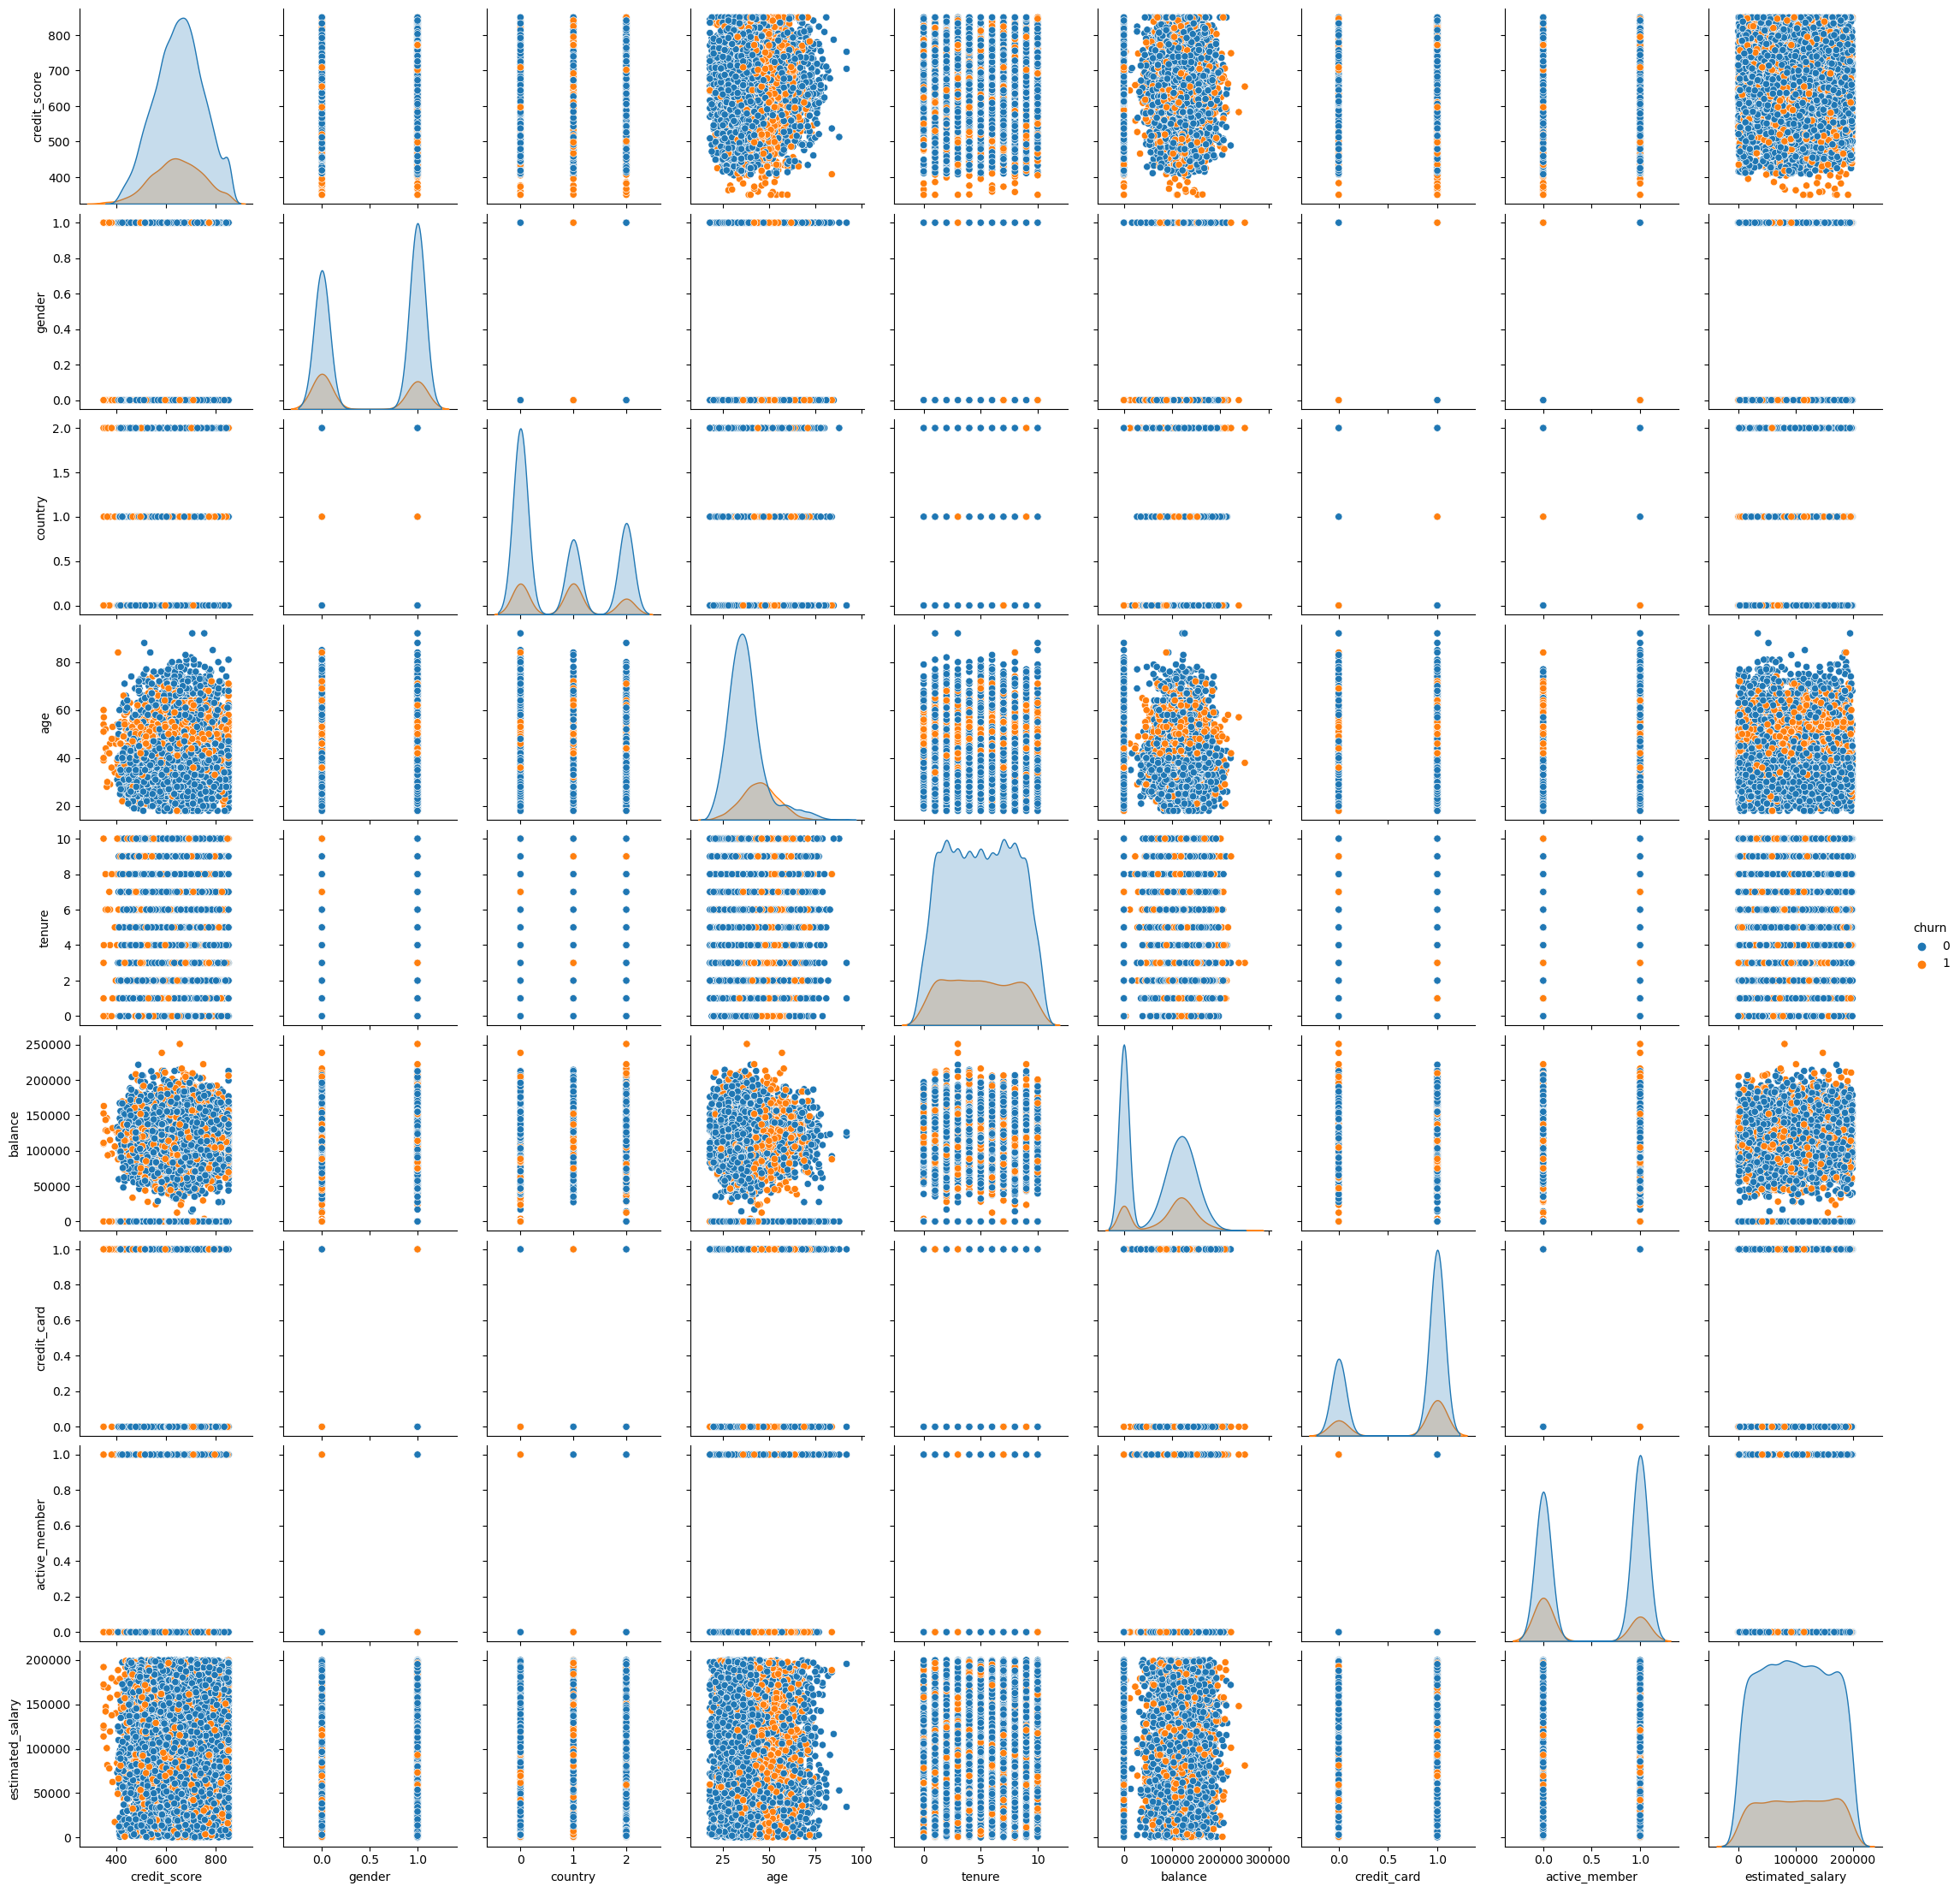

In [211]:
visuale_features.append("churn")
sns.pairplot(data=df[visuale_features], hue="churn")

<Axes: >

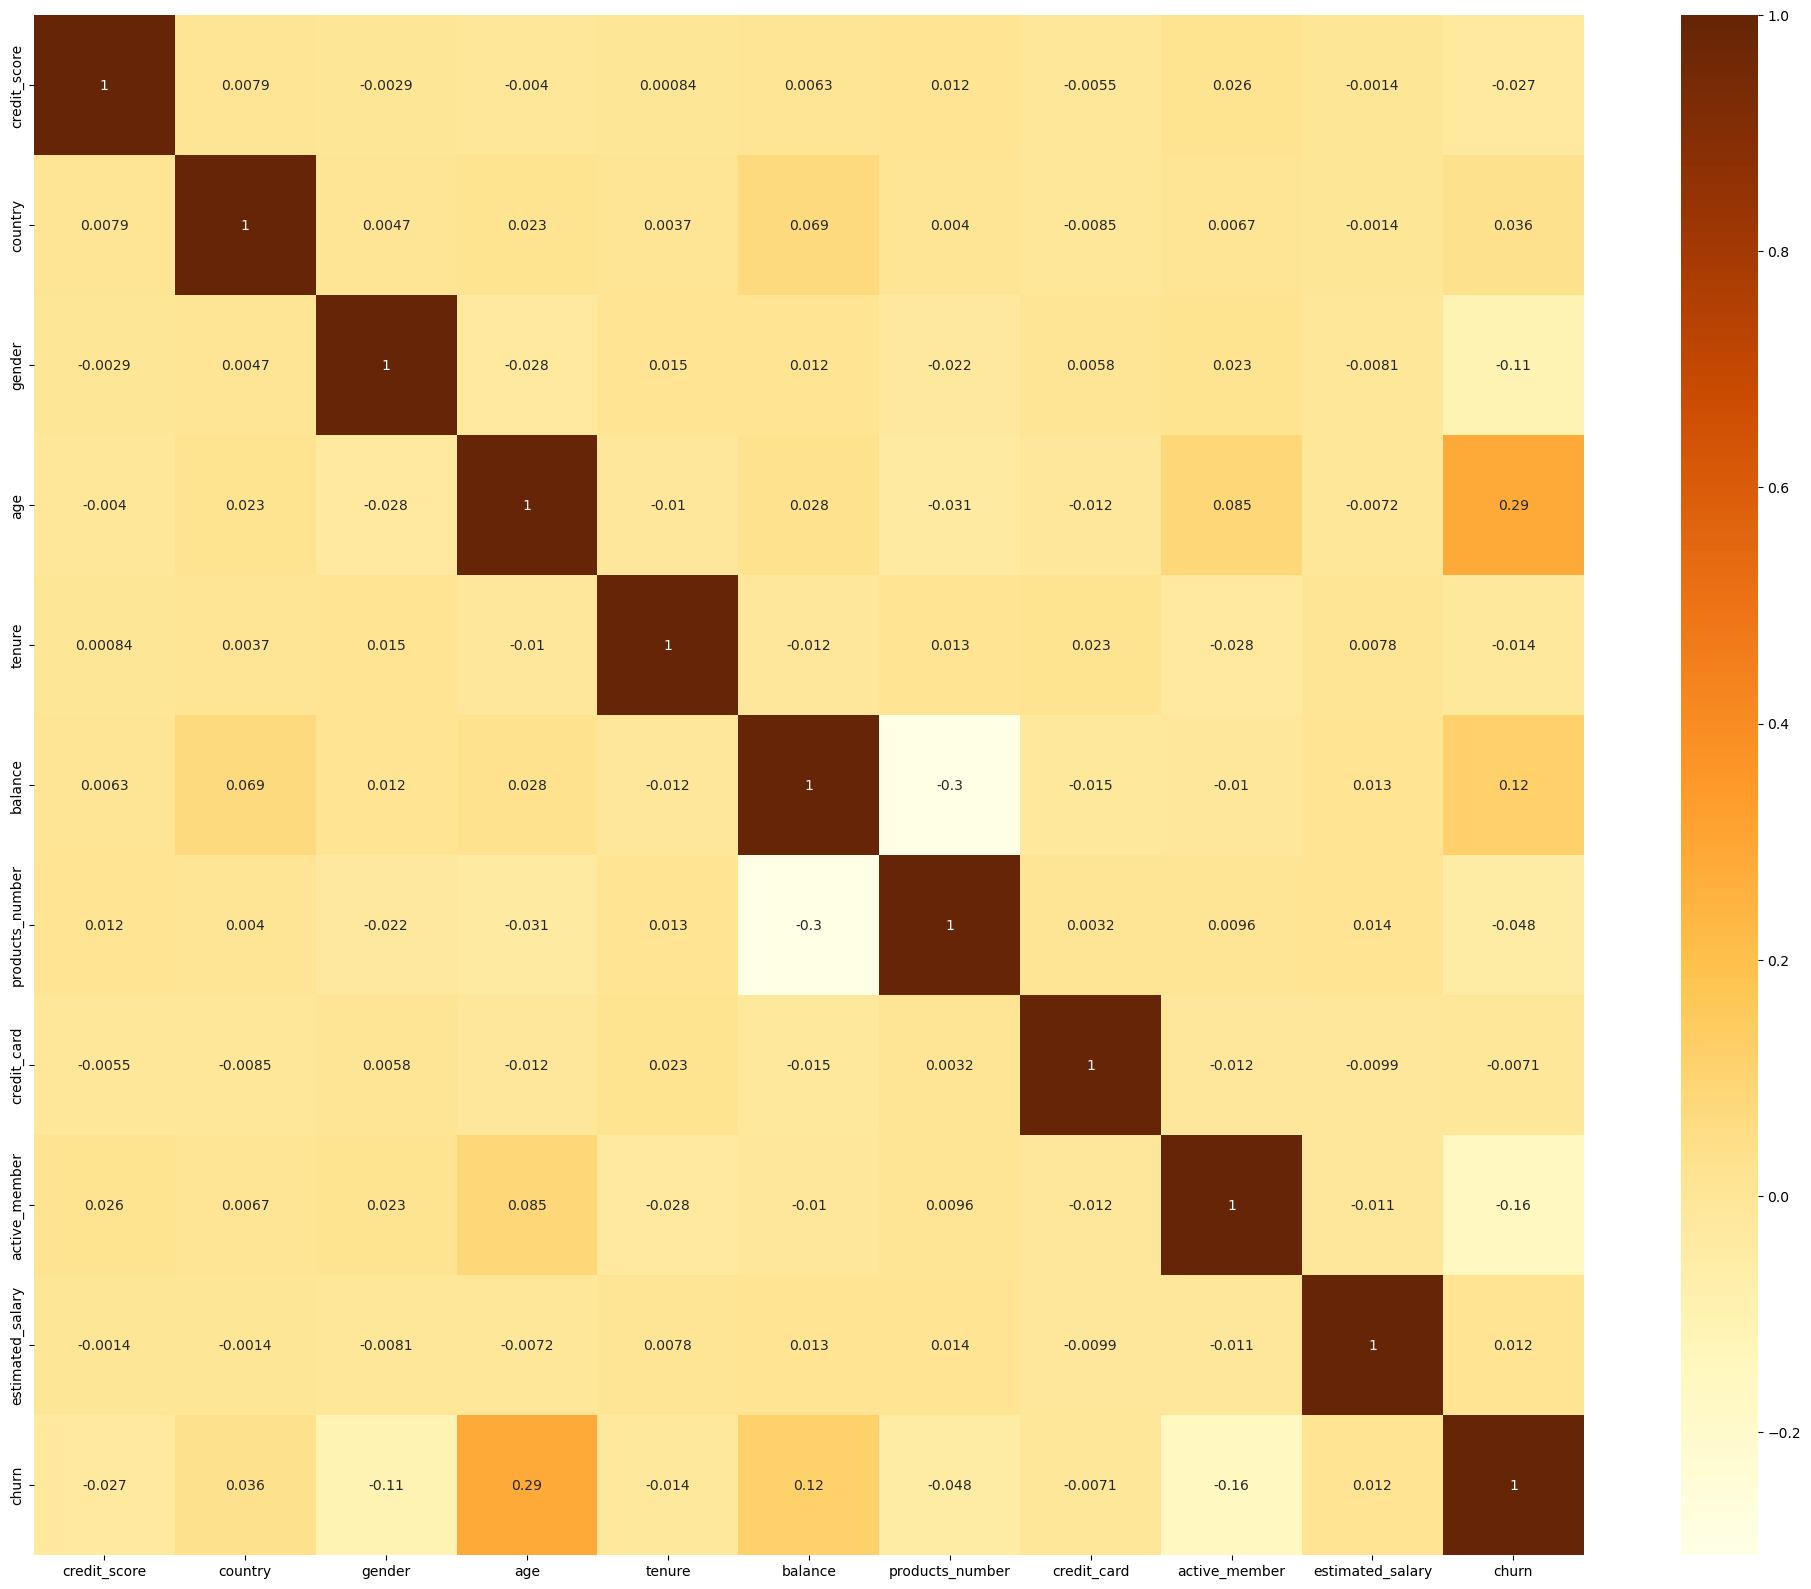

In [155]:
corr = df.corr()
plt.figure(figsize = (25,20))
sns.heatmap(corr, annot = True, cmap = 'YlOrBr')

In [156]:
fig = px.scatter(df, x="age", y="credit_score", color="churn")
fig.update_layout(title="Customer churn by age and credit score")
fig.show()

In [157]:
fig = px.scatter(df, x="age", y="country", color="churn")
fig.update_layout(title="Customer churn by age and balance")
fig.show()

In [158]:
fig = px.scatter(df, x="tenure", y="age", color="churn")
fig.update_layout(title="Customer churn by age and balance")
fig.show()

In [159]:
fig = px.scatter(df, x="balance", y="age", color="churn")
fig.update_layout(title="Customer churn by age and tenure")
fig.show()

In [160]:
fig = px.scatter(df, x="credit_card", y="age", color="churn")
fig.update_layout(title="Customer churn by age and tenure")
fig.show()

In [161]:
fig = px.scatter(df, x="gender", y="age", color="churn")
fig.update_layout(title="Customer churn by age and tenure")
fig.show()

In [162]:
fig = px.scatter(df, x="active_member", y="age", color="churn")
fig.update_layout(title="Customer churn by age and tenure")
fig.show()

<Axes: >

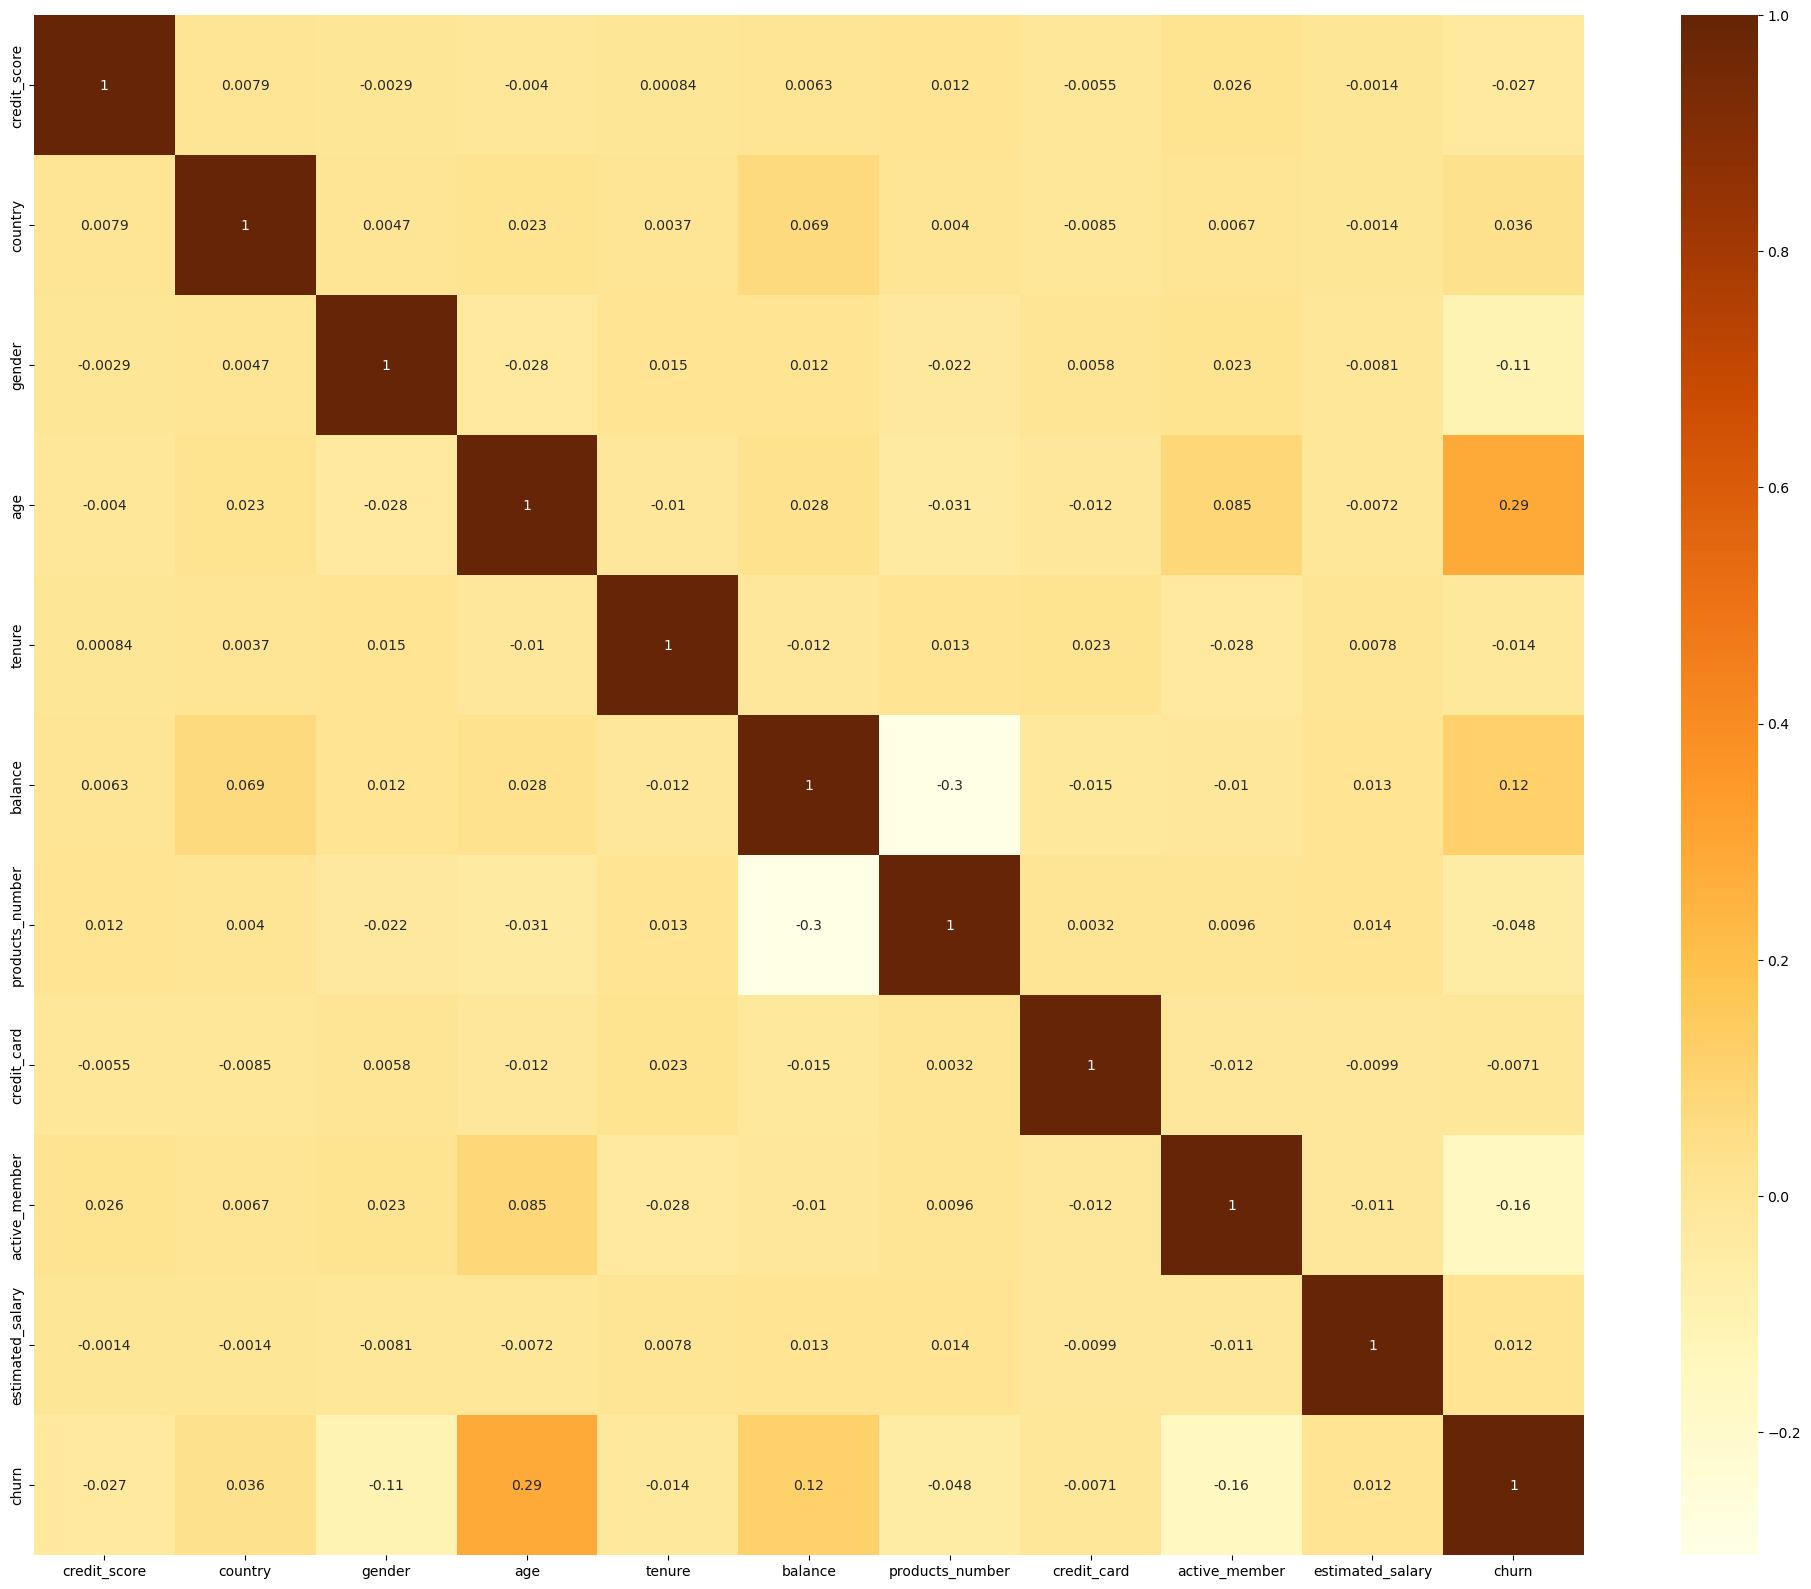

In [163]:
corr = df.corr()
plt.figure(figsize = (25,20))
sns.heatmap(corr, annot = True, cmap = 'YlOrBr')

In [164]:
X = df.drop(columns = ['churn'])
Y = df['churn'].values

In [165]:
#from sklearn.preprocessing import MinMaxScaler
#S=MinMaxScaler()
#X=S.fit_transform(X)

In [166]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state= 42)

In [167]:
lr_model = LogisticRegression()
lr_model.fit(X_train, Y_train)
lr_model_pred = lr_model.predict(X_test)
print("Gradient Boosting Classifier", accuracy_score(Y_test, lr_model_pred))

Gradient Boosting Classifier 0.8005


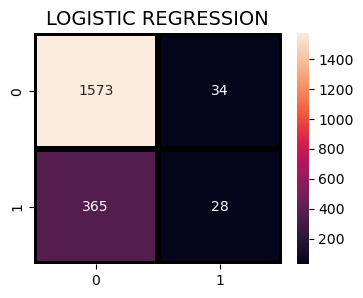

              precision    recall  f1-score   support

           0       0.81      0.98      0.89      1607
           1       0.45      0.07      0.12       393

    accuracy                           0.80      2000
   macro avg       0.63      0.53      0.51      2000
weighted avg       0.74      0.80      0.74      2000



In [168]:
lr_pred= lr_model.predict(X_test)
report = classification_report(Y_test, lr_pred)
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(Y_test, lr_pred),
           annot= True, fmt = "d",linecolor = "k", linewidths = 4)

plt.title("LOGISTIC REGRESSION", fontsize=14)
plt.show()
print(report)

In [169]:
residuals=Y_test-lr_model_pred
residuals

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

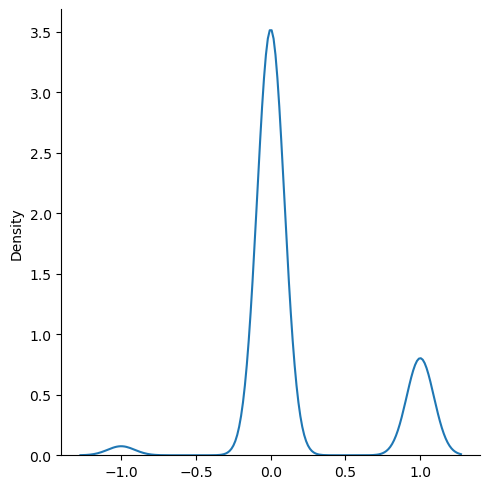

In [170]:
sns.displot(residuals,kind="kde")

In [171]:
gb = GradientBoostingClassifier()
gb.fit(X_train, Y_train)
gb_pred = gb.predict(X_test)
print("Gradient Boosting Classifier", accuracy_score(Y_test, gb_pred))

Gradient Boosting Classifier 0.8655


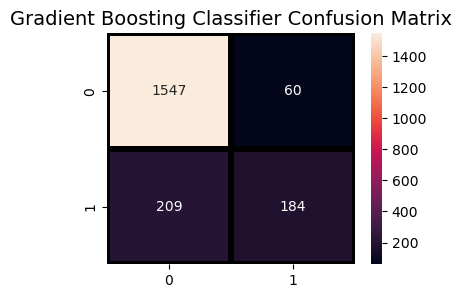

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.47      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.86      0.87      0.85      2000



In [172]:
gbd_pred = gb.predict(X_test)
report = classification_report(Y_test, gbd_pred)
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(Y_test, gb_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Gradient Boosting Classifier Confusion Matrix",fontsize=14)
plt.show()
print(report)

In [173]:
residuals=Y_test-gb_pred
residuals

array([0, 0, 0, ..., 0, 1, 1], dtype=int64)

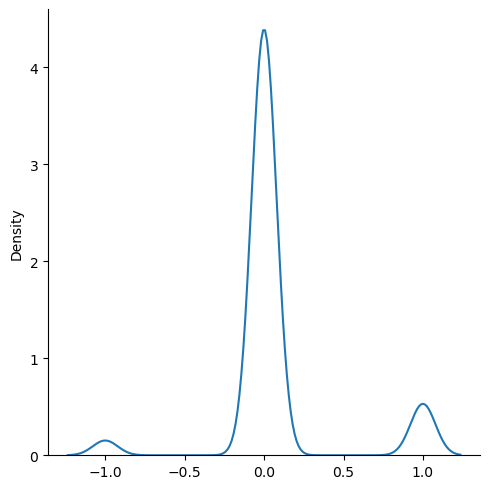

In [174]:
sns.displot(residuals,kind="kde")

In [175]:
from sklearn.ensemble import AdaBoostClassifier

In [176]:
a_model = AdaBoostClassifier()
a_model.fit(X_train,Y_train)
a_preds = a_model.predict(X_test)
print("AdaBoost Classifier accuracy")
metrics.accuracy_score(Y_test, a_preds)

AdaBoost Classifier accuracy


0.853

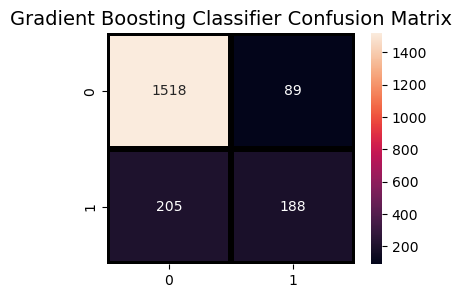

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      1607
           1       0.68      0.48      0.56       393

    accuracy                           0.85      2000
   macro avg       0.78      0.71      0.74      2000
weighted avg       0.84      0.85      0.84      2000



In [177]:
ad_pred = a_model.predict(X_test)
report = classification_report(Y_test, ad_pred)
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(Y_test, a_preds),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Gradient Boosting Classifier Confusion Matrix",fontsize=14)
plt.show()
print(report)

In [178]:
residuals=Y_test-a_preds
residuals

array([0, 0, 0, ..., 0, 1, 1], dtype=int64)

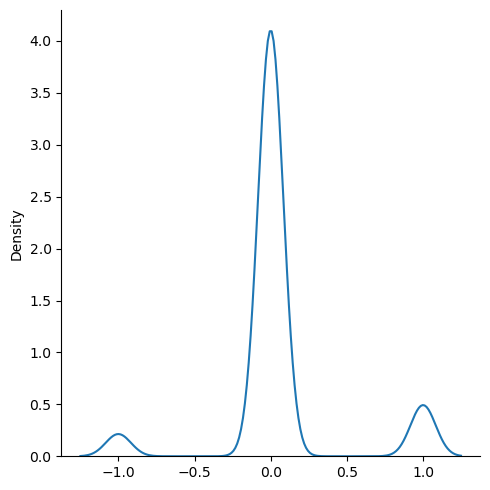

In [179]:
sns.displot(residuals,kind="kde")

In [180]:
from sklearn.ensemble import RandomForestClassifier

In [181]:
r_model = RandomForestClassifier()
r_model.fit(X_train, Y_train)
prediction_test1 = r_model.predict(X_test)
print (metrics.accuracy_score(Y_test, prediction_test1))

0.864


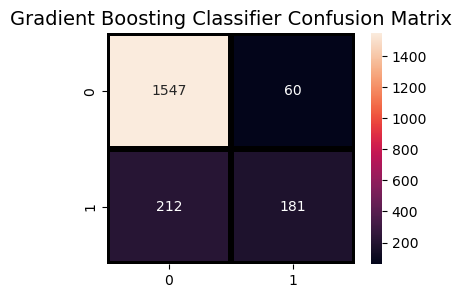

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.46      0.57       393

    accuracy                           0.86      2000
   macro avg       0.82      0.71      0.75      2000
weighted avg       0.85      0.86      0.85      2000



In [182]:
ar_pred = r_model.predict(X_test)
report = classification_report(Y_test, ar_pred)
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(Y_test, prediction_test1),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Gradient Boosting Classifier Confusion Matrix",fontsize=14)
plt.show()
print(report)

In [183]:
residuals=Y_test-prediction_test1
residuals

array([0, 0, 0, ..., 0, 1, 1], dtype=int64)

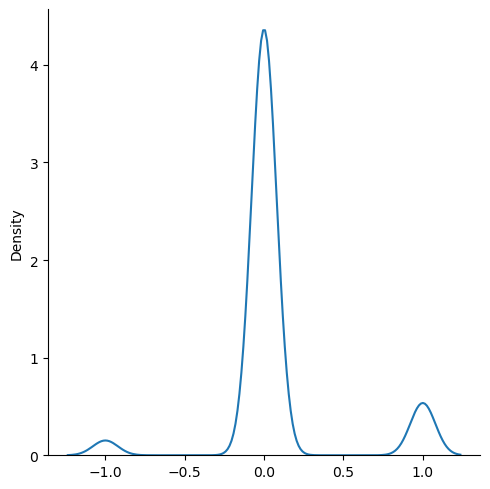

In [184]:
sns.displot(residuals,kind="kde")

In [185]:
lg_model = LGBMClassifier(verbose=-1)
lg_model.fit(X_train, Y_train)
prediction_test2 = lg_model.predict(X_test)
print (metrics.accuracy_score(Y_test, prediction_test2))

0.8675


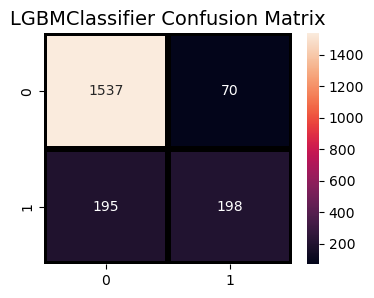

              precision    recall  f1-score   support

           0       0.89      0.96      0.92      1607
           1       0.74      0.50      0.60       393

    accuracy                           0.87      2000
   macro avg       0.81      0.73      0.76      2000
weighted avg       0.86      0.87      0.86      2000



In [186]:
lgb_pred = lg_model.predict(X_test)
report = classification_report(Y_test, lgb_pred)
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(Y_test, prediction_test2),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("LGBMClassifier Confusion Matrix",fontsize=14)
plt.show()
print(report)

In [187]:
residuals=Y_test-prediction_test2
residuals

array([0, 0, 0, ..., 0, 1, 1], dtype=int64)

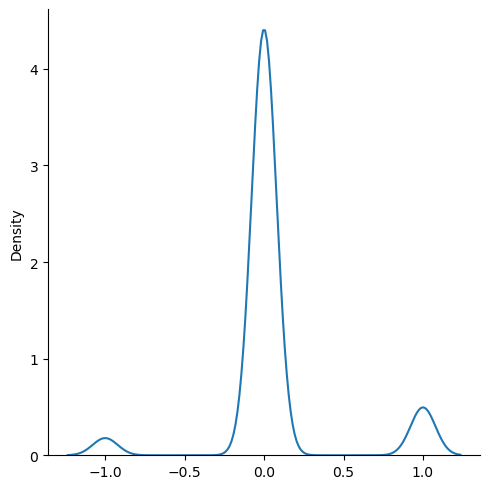

In [188]:
sns.displot(residuals,kind="kde")

In [189]:
from xgboost import XGBClassifier
import xgboost as xgb

In [190]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train, Y_train)
prediction_test3 = xgb_model.predict(X_test)
print (metrics.accuracy_score(Y_test, prediction_test3))

0.861


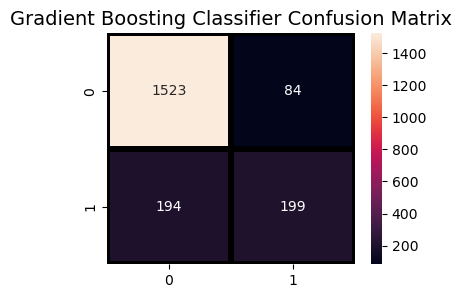

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1607
           1       0.70      0.51      0.59       393

    accuracy                           0.86      2000
   macro avg       0.80      0.73      0.75      2000
weighted avg       0.85      0.86      0.85      2000



In [191]:
xgb_pred = xgb_model.predict(X_test)
report = classification_report(Y_test, xgb_pred)
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(Y_test, prediction_test3),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Gradient Boosting Classifier Confusion Matrix",fontsize=14)
plt.show()
print(report)

In [192]:
residuals=Y_test-prediction_test3
residuals

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

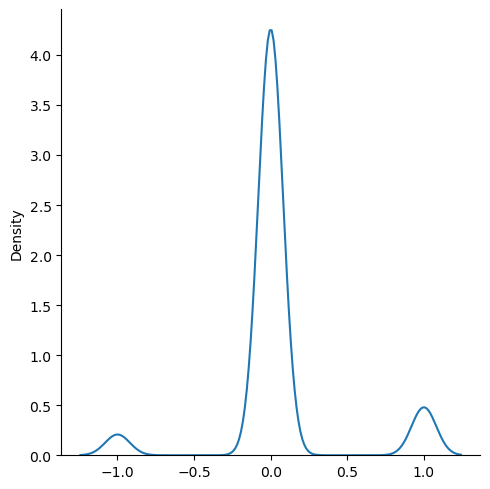

In [193]:
sns.displot(residuals,kind="kde")

In [194]:
input_data = np.array([502,0,0,42,8,159660.80,3,1,0,113931.57])
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = gb.predict(input_data_reshaped)
prediction

array([1], dtype=int64)

In [220]:
import pickle

In [221]:
pickle.dump(gb,open('gb_model.pkl','wb'))

In [222]:
gb=pickle.load(open('gb_model.pkl','rb'))

In [229]:
gb.predict()

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [199]:
import lazypredict
from lazypredict.Supervised import LazyClassifier
churnlazy = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric = None,classifiers = 'all')
models,predictions = churnlazy.fit(X_train, X_test, Y_train, Y_test)
print(models)

 97%|█████████▋| 28/29 [00:24<00:00,  1.05it/s]

[LightGBM] [Info] Number of positive: 1644, number of negative: 6356
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000860 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 861
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.205500 -> initscore=-1.352267
[LightGBM] [Info] Start training from score -1.352267


100%|██████████| 29/29 [00:25<00:00,  1.16it/s]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
XGBClassifier                      0.86               0.73     0.73      0.85   
LGBMClassifier                     0.87               0.73     0.73      0.86   
RandomForestClassifier             0.86               0.71     0.71      0.85   
AdaBoostClassifier                 0.85               0.71     0.71      0.84   
ExtraTreesClassifier               0.86               0.71     0.71      0.85   
NearestCentroid                    0.70               0.69     0.69      0.73   
BaggingClassifier                  0.85               0.69     0.69      0.83   
DecisionTreeClassifier             0.78               0.68     0.68      0.79   
LabelSpreading                     0.81               0.68     0.68      0.80   
LabelPropagation                   0.80               0.68     0.68      0.80   
SVC                         